In [8]:
# import libraries
from music21 import *
from random import random, randint
import matplotlib.pyplot as plt
import numpy as np
import math
from math import pi

In [9]:
# shortcut to play a stream
def play(stream):
    midi.realtime.StreamPlayer(stream).play()

# Intro
## Context
Here, the intro will represent the moment when a person is falling asleep. i.e. the time between a state where the person is fully conscious and a state where the person is sleeping.
## Idea
We can think of a transition between chaos (first state) and order (second state).
### Chaos
Chaos is a good representation of the day of a person because a lot of things happened and sometimes, these events are totally due to randomness.
We can represent chaos by taking notes randomly is a certain scale. The fact that these notes can have no relations between them is good to describe chaos. It will certainly sound dissonant but this might be what we want.
### Order
As soon as the person is falling asleep, calm is slowly coming in and taking the lead of the situation. Up to the moment where the person reaches a stable state, when the heartbeat is constant and slowly goes down to stabilize at some point.
We can reprensent this by slowly reducing the range of random notes defined in chaos up to a point where just one note is possible. In terms of rhythm, the length of notes will become higher and higher as we go deeper in the sleep.
## Visualisation of idea
We can use functions 1/x and -1/x to visualize the transition between chaos and order. The deeper we go in the sleep (x values), the thinner is the range of notes.

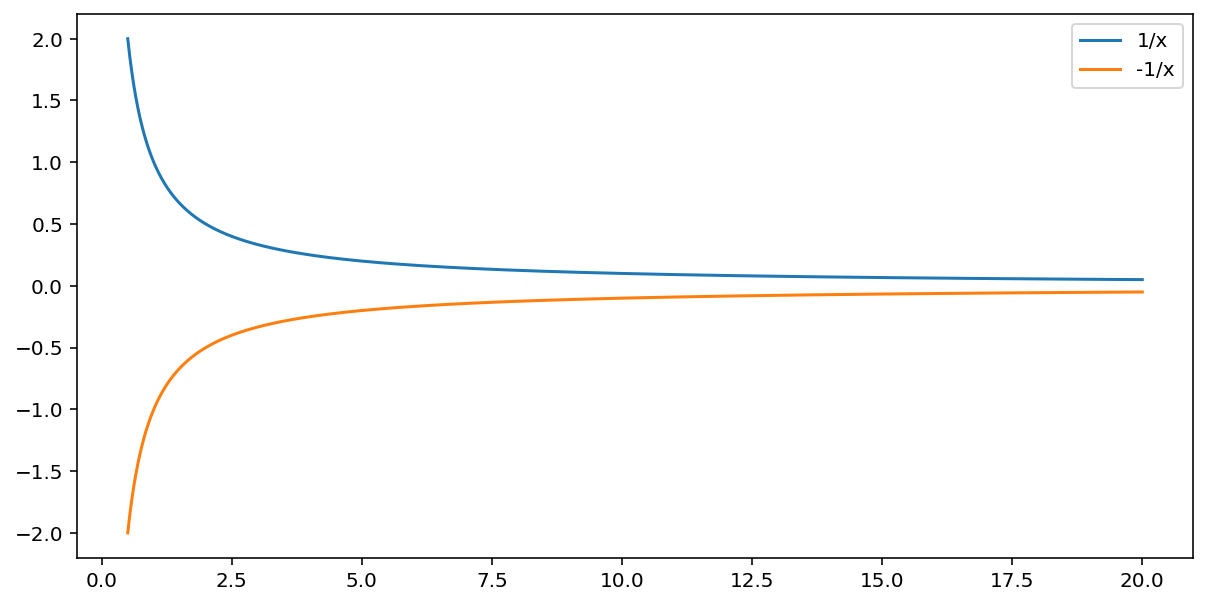

In [10]:
# plot 1/x and -1/x
xplot = np.linspace(0.5, 20, 1000)
yPos = 1 / xplot
yNeg = -1 / xplot
fig = plt.figure(figsize = (10, 5))
plt.plot(xplot, yPos, label = "1/x")
plt.plot(xplot, yNeg, label = "-1/x")
plt.legend()
plt.show()

# Base
We will start by taking a scale that we will reduce by 1 from both side until we reach the single note in the middle

In [18]:
# function returning array with char of notes of the major scale
def getMajorScale(note):
    return [str(n) for n in scale.MajorScale(note).getPitches('C3', 'C5')]

# array of notes
scl = getMajorScale('C')
print(scl)
speed = 0.03125

['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']


# Implementation
We will now generate all notes to create this funnel of sound.

In [19]:
s = stream.Stream()
step = (0.25 - speed) / 127
nextStep = 64
n = 5
for i in range(127):
    s.append(note.Note(scl[randint(0, len(scl) - 1)], quarterLength = 4 * speed))
    speed += step
    if i >= nextStep:
        scl = scl[1:-1]
        nextStep += 2 ** n
        n -= 1
s.append(note.Note(scl[1:-1][0], quarterLength = 4))
# s.show()

In [20]:
play(s)